In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 7.2 kB/s  eta 0:00:01
     |████████████████████████████████| 142.8 MB 37 kB/s s eta 0:00:01
     |████████████████████████████████| 3.1 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 40.2 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 81 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 7.0 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 127 kB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 43.7 MB/s eta 0:00:01
     |████████████████████████████████| 378 kB 44.4 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 6.2 MB 38.5 MB/s eta 0:00:01
     |██████████████████████████████

  Created wheel for shap: filename=shap-0.32.1-cp37-cp37m-linux_x86_64.whl size=381812 sha256=0961dcc1e1f7d954656fca4c6370c213f3a3589ffa223fbd8fc60229e9240638
  Stored in directory: /root/.cache/pip/wheels/fb/73/18/f32e1b595c0bb416c036ac48442c8f74c37a2d80ee5d3d4f60
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=67743 sha256=b92d31b5f56f4871ad2248b19c42948f10071f0171d962f623b5e950b5a3f6d8
  Stored in directory: /root/.cache/pip/wheels/16/22/f8/084326defc3fe232aacf4a4c855c58de34b62f35387acc1eda
  Created wheel for pyod: filename=pyod-0.7.9-py3-none-any.whl size=105567 sha256=57e3f518809cfab5bdc2445e0500483bfaf94a7bd096c0c217cb5938664f62f2
  Stored in directory: /root/.cache/pip/wheels/4d/ab/b1/0fcb28f40e2e65d2aeeb7721d1a3b9714f93c06ab6ead36ce6
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=102e352a06fdd2c665ed139ee535d469aecccd224ddf171957a88eda3677c60d
  Stored in directory: /root/.cache/pip/w

# Import libraries and dataset

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Glass_Quality_Participants_Data/Test.csv
/kaggle/input/Glass_Quality_Participants_Data/Sample_Submission.xlsx
/kaggle/input/Glass_Quality_Participants_Data/Train.csv


In [3]:
train = pd.read_csv('/kaggle/input/Glass_Quality_Participants_Data/Train.csv')
test = pd.read_csv('/kaggle/input/Glass_Quality_Participants_Data/Test.csv')
sub = pd.read_excel('/kaggle/input/Glass_Quality_Participants_Data/Sample_Submission.xlsx')

In [4]:
train.shape, test.shape, sub.shape

((1358, 16), (583, 15), (583, 2))

In [5]:
train.head(3)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2


In [6]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

In [7]:
train.nunique()

grade_A_Component_1       2
grade_A_Component_2       2
max_luminosity          131
thickness               143
xmin                    775
xmax                    811
ymin                   1358
ymax                   1358
pixel_area              813
log_area               1358
x_component_1             2
x_component_2             2
x_component_3             2
x_component_4             2
x_component_5             2
class                     2
dtype: int64

In [8]:
train.dtypes

grade_A_Component_1      int64
grade_A_Component_2      int64
max_luminosity           int64
thickness                int64
xmin                     int64
xmax                     int64
ymin                     int64
ymax                     int64
pixel_area               int64
log_area               float64
x_component_1            int64
x_component_2            int64
x_component_3            int64
x_component_4            int64
x_component_5            int64
class                    int64
dtype: object

# Setting up Environment

In [35]:
from pycaret.classification import *

In [125]:
exp_clf101 = setup(data = train, target = 'class', session_id=123,
                   normalize = True, 
                   transformation = True,
                   ignore_low_variance = True,
                   remove_multicollinearity = True,
                   feature_interaction=True                   
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1358, 16)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [217]:
#help(create_model)

# Comparing All Models

In [128]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.836800,0.910000,0.880800,0.872100,0.876100,0.637000
1,Light Gradient Boosting Machine,0.828400,0.903200,0.863100,0.873300,0.867800,0.623100
2,Extreme Gradient Boosting,0.823200,0.908800,0.884100,0.852100,0.867500,0.601600
3,Gradient Boosting Classifier,0.822100,0.906100,0.874300,0.857400,0.865200,0.603100
4,Extra Trees Classifier,0.815800,0.915500,0.864700,0.857200,0.860000,0.589700
5,Ada Boost Classifier,0.795800,0.884100,0.855000,0.838300,0.845200,0.543600
6,Random Forest Classifier,0.794700,0.870400,0.895300,0.811800,0.850800,0.523300
7,Decision Tree Classifier,0.784200,0.756300,0.847000,0.827300,0.836600,0.518600
8,K Neighbors Classifier,0.760000,0.821800,0.842000,0.801600,0.820500,0.457800
9,Linear Discriminant Analysis,0.753700,0.857900,0.771300,0.844900,0.803000,0.472800


# Create a Model

In [129]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.9043,0.8730,0.8333,0.8527,0.5418
1,0.8421,0.8876,0.8871,0.8730,0.8800,0.6493
2,0.8526,0.9154,0.9032,0.8750,0.8889,0.6703
3,0.8316,0.9086,0.8710,0.8710,0.8710,0.6285
4,0.8737,0.9311,0.9194,0.8906,0.9048,0.7174
5,0.8421,0.9335,0.8871,0.8730,0.8800,0.6493
6,0.7895,0.8891,0.8871,0.8088,0.8462,0.5151
7,0.8211,0.8798,0.8387,0.8814,0.8595,0.6135
8,0.8211,0.9018,0.8387,0.8814,0.8595,0.6135
9,0.8947,0.9487,0.9032,0.9333,0.9180,0.7711


In [130]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8211,0.8963,0.8571,0.8710,0.8640,0.6025
1,0.8105,0.8661,0.8387,0.8667,0.8525,0.5880
2,0.8211,0.8983,0.8387,0.8814,0.8595,0.6135
3,0.8316,0.9179,0.8710,0.8710,0.8710,0.6285
4,0.8526,0.9238,0.8871,0.8871,0.8871,0.6750
5,0.8526,0.9169,0.9194,0.8636,0.8906,0.6655
6,0.7895,0.8878,0.8548,0.8281,0.8413,0.5290
7,0.7895,0.8803,0.8226,0.8500,0.8361,0.5422
8,0.8211,0.8993,0.8226,0.8947,0.8571,0.6188
9,0.8947,0.9457,0.9194,0.9194,0.9194,0.7678


In [138]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8105,0.9152,0.9048,0.8261,0.8636,0.5554
1,0.8211,0.9238,0.8387,0.8814,0.8595,0.6135
2,0.8421,0.9257,0.9194,0.8507,0.8837,0.6390
3,0.8000,0.8917,0.8387,0.8525,0.8455,0.5620
4,0.8211,0.9294,0.8387,0.8814,0.8595,0.6135
5,0.8105,0.9247,0.8871,0.8333,0.8594,0.5699
6,0.7579,0.8898,0.8710,0.7826,0.8244,0.4382
7,0.8105,0.8842,0.8387,0.8667,0.8525,0.5880
8,0.8421,0.9247,0.8387,0.9123,0.8739,0.6637
9,0.8421,0.9462,0.8710,0.8852,0.8780,0.6542


# Tune a Model

In [140]:
tuned_catboost = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.9033,0.8889,0.8235,0.8550,0.5344
1,0.8316,0.8842,0.9032,0.8485,0.8750,0.6177
2,0.8316,0.9257,0.8548,0.8833,0.8689,0.6337
3,0.8211,0.8925,0.8226,0.8947,0.8571,0.6188
4,0.8947,0.9413,0.9355,0.9062,0.9206,0.7645
5,0.8526,0.9291,0.9355,0.8529,0.8923,0.6605
6,0.7789,0.8915,0.8548,0.8154,0.8346,0.5019
7,0.7789,0.8680,0.8226,0.8361,0.8293,0.5159
8,0.8316,0.9154,0.8387,0.8966,0.8667,0.6388
9,0.8737,0.9477,0.9032,0.9032,0.9032,0.7214


In [141]:
tuned_lgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8211,0.8958,0.8730,0.8594,0.8661,0.5964
1,0.8000,0.8675,0.8226,0.8644,0.8430,0.5681
2,0.8000,0.9018,0.8387,0.8525,0.8455,0.5620
3,0.8316,0.9076,0.8710,0.8710,0.8710,0.6285
4,0.8526,0.9267,0.8548,0.9138,0.8833,0.6839
5,0.8421,0.9106,0.9032,0.8615,0.8819,0.6442
6,0.8000,0.8978,0.8871,0.8209,0.8527,0.5427
7,0.8105,0.8842,0.8548,0.8548,0.8548,0.5821
8,0.8211,0.8935,0.8387,0.8814,0.8595,0.6135
9,0.9158,0.9506,0.9355,0.9355,0.9355,0.8143


In [142]:
tuned_et = tune_model('et')
#tuned_et = tune_model('et', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8526,0.9236,0.9048,0.8769,0.8906,0.6650
1,0.8211,0.9130,0.8226,0.8947,0.8571,0.6188
2,0.8632,0.9179,0.8871,0.9016,0.8943,0.7003
3,0.8211,0.9013,0.8548,0.8689,0.8618,0.6081
4,0.8421,0.9252,0.8548,0.8983,0.8760,0.6590
5,0.8526,0.9301,0.9194,0.8636,0.8906,0.6655
6,0.7789,0.8895,0.8710,0.8060,0.8372,0.4946
7,0.8316,0.9091,0.8710,0.8710,0.8710,0.6285
8,0.8000,0.9062,0.8548,0.8413,0.8480,0.5557
9,0.8105,0.9384,0.8548,0.8548,0.8548,0.5821


# Plot a Model

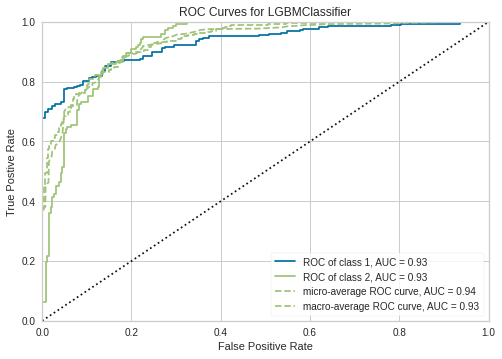

In [144]:
plot_model(tuned_lgbm, plot='auc')

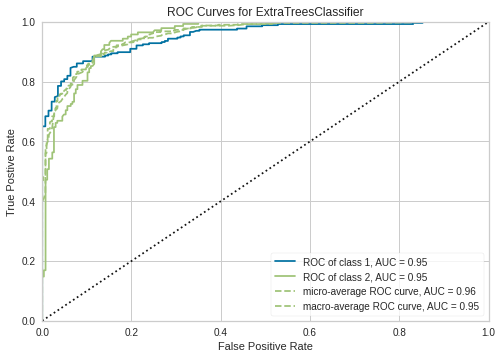

In [146]:
plot_model(tuned_et, plot='auc')

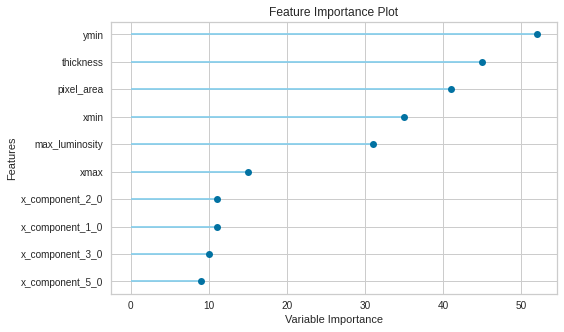

In [70]:
plot_model(tuned_lgbm, plot='feature')

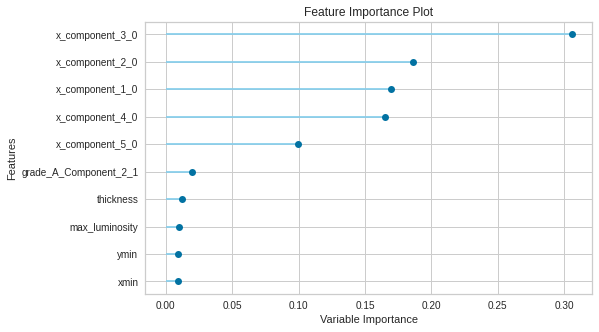

In [71]:
plot_model(tuned_xgb, plot='feature')

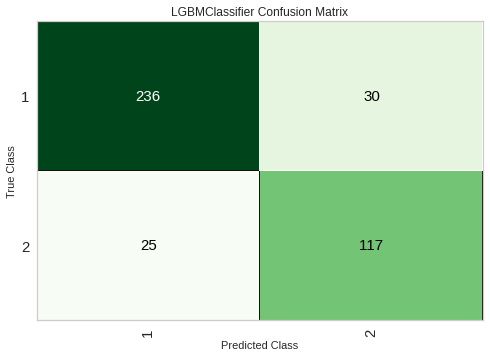

In [72]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

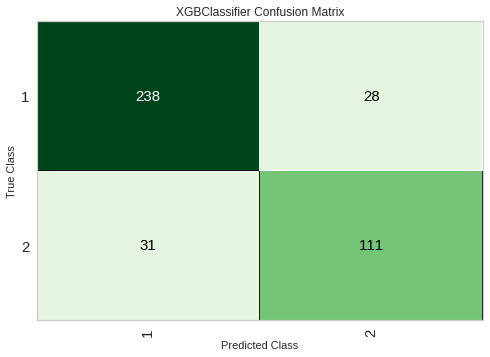

In [73]:
plot_model(tuned_xgb, plot = 'confusion_matrix')

In [147]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

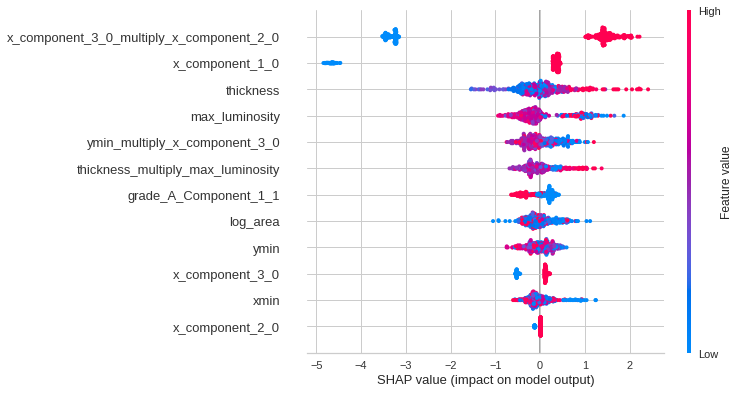

In [148]:
interpret_model(tuned_catboost)

# Predict on test / hold-out Sample

In [149]:
predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.8824,0.9524,0.8835,0.9325,0.9073,0.7466


In [150]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8431,0.9301,0.8797,0.8797,0.8797,0.6543


In [151]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8431,0.9295,0.8722,0.8855,0.8788,0.6566


# Finalize Model for Deployment

In [153]:
final_catboost = finalize_model(tuned_catboost)
predict_model(final_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9608,0.9935,0.9662,0.9735,0.9698,0.9139


In [88]:
final_lgbm = finalize_model(tuned_lgbm)
predict_model(final_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.9755,0.9976,0.9737,0.9885,0.9811,0.9463


In [154]:
final_et = finalize_model(tuned_et)
predict_model(final_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9926,0.9997,0.9925,0.9962,0.9944,0.9838


# Ensemble a Model

## Bagging

In [212]:
bagged_et = ensemble_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8316,0.8948,0.8889,0.8615,0.8750,0.6171
1,0.8316,0.8861,0.8871,0.8594,0.8730,0.6232
2,0.8211,0.9022,0.8710,0.8571,0.8640,0.6025
3,0.8000,0.9110,0.8548,0.8413,0.8480,0.5557
4,0.8526,0.9194,0.8871,0.8871,0.8871,0.6750
5,0.8842,0.9374,0.9355,0.8923,0.9134,0.7391
6,0.7895,0.8959,0.8710,0.8182,0.8438,0.5221
7,0.7895,0.8710,0.8226,0.8500,0.8361,0.5422
8,0.8000,0.9071,0.8548,0.8413,0.8480,0.5557
9,0.8842,0.9516,0.9194,0.9048,0.9120,0.7428


In [168]:
#print(bagged_et)

## Boosting

In [213]:
boosted_et = ensemble_model(lgbm, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8316,0.8934,0.8730,0.8730,0.8730,0.6230
1,0.8211,0.8729,0.8548,0.8689,0.8618,0.6081
2,0.8211,0.8925,0.8548,0.8689,0.8618,0.6081
3,0.8105,0.9101,0.8548,0.8548,0.8548,0.5821
4,0.8632,0.9223,0.8871,0.9016,0.8943,0.7003
5,0.8105,0.9130,0.8710,0.8438,0.8571,0.5761
6,0.8000,0.8856,0.8710,0.8308,0.8504,0.5493
7,0.8000,0.8832,0.8387,0.8525,0.8455,0.5620
8,0.8105,0.9003,0.8387,0.8667,0.8525,0.5880
9,0.8737,0.9438,0.8871,0.9167,0.9016,0.7253


In [214]:
boosted_et2 = ensemble_model(lgbm, method = 'Boosting', n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8316,0.8934,0.8730,0.8730,0.8730,0.6230
1,0.8211,0.8729,0.8548,0.8689,0.8618,0.6081
2,0.8211,0.8925,0.8548,0.8689,0.8618,0.6081
3,0.8105,0.9101,0.8548,0.8548,0.8548,0.5821
4,0.8632,0.9223,0.8871,0.9016,0.8943,0.7003
5,0.8105,0.9130,0.8710,0.8438,0.8571,0.5761
6,0.8000,0.8856,0.8710,0.8308,0.8504,0.5493
7,0.8000,0.8832,0.8387,0.8525,0.8455,0.5620
8,0.8105,0.9003,0.8387,0.8667,0.8525,0.5880
9,0.8737,0.9438,0.8871,0.9167,0.9016,0.7253


In [218]:
tuned_boosted_et = tune_model('lightgbm', ensemble=True, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8211,0.8958,0.8730,0.8594,0.8661,0.5964
1,0.8000,0.8675,0.8226,0.8644,0.8430,0.5681
2,0.8000,0.9018,0.8387,0.8525,0.8455,0.5620
3,0.8316,0.9076,0.8710,0.8710,0.8710,0.6285
4,0.8526,0.9267,0.8548,0.9138,0.8833,0.6839
5,0.8421,0.9106,0.9032,0.8615,0.8819,0.6442
6,0.8000,0.8978,0.8871,0.8209,0.8527,0.5427
7,0.8105,0.8842,0.8548,0.8548,0.8548,0.5821
8,0.8211,0.8935,0.8387,0.8814,0.8595,0.6135
9,0.9158,0.9506,0.9355,0.9355,0.9355,0.8143


## Blending

In [219]:
blend_hard = blend_models(method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8211,0.0,0.9206,0.8286,0.8722,0.5767
1,0.8000,0.0,0.8548,0.8413,0.8480,0.5557
2,0.8526,0.0,0.9032,0.8750,0.8889,0.6703
3,0.8211,0.0,0.8871,0.8462,0.8661,0.5968
4,0.8526,0.0,0.9032,0.8750,0.8889,0.6703
5,0.8211,0.0,0.9032,0.8358,0.8682,0.5908
6,0.7474,0.0,0.9032,0.7568,0.8235,0.3910
7,0.8211,0.0,0.8710,0.8571,0.8640,0.6025
8,0.8421,0.0,0.9355,0.8406,0.8855,0.6336
9,0.8526,0.0,0.9032,0.8750,0.8889,0.6703


In [220]:
blend_soft = blend_models(method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8526,0.9102,0.9048,0.8769,0.8906,0.6650
1,0.8316,0.8895,0.8871,0.8594,0.8730,0.6232
2,0.8632,0.9296,0.9032,0.8889,0.8960,0.6960
3,0.8000,0.8974,0.8548,0.8413,0.8480,0.5557
4,0.8737,0.9257,0.9032,0.9032,0.9032,0.7214
5,0.8526,0.9272,0.9194,0.8636,0.8906,0.6655
6,0.7895,0.8803,0.8871,0.8088,0.8462,0.5151
7,0.7789,0.8680,0.8226,0.8361,0.8293,0.5159
8,0.8316,0.9218,0.8871,0.8594,0.8730,0.6232
9,0.8526,0.9453,0.8871,0.8871,0.8871,0.6750


In [180]:
gbc = create_model('gbc', verbose = False)
et = create_model('et', verbose = False)
lgbm = create_model('lightgbm', verbose = False)

In [181]:
blend_specific_soft = blend_models(estimator_list = [gbc, et, lgbm], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8316,0.9082,0.8889,0.8615,0.8750,0.6171
1,0.8211,0.8993,0.8548,0.8689,0.8618,0.6081
2,0.8526,0.9169,0.8871,0.8871,0.8871,0.6750
3,0.8000,0.9140,0.8226,0.8644,0.8430,0.5681
4,0.8737,0.9330,0.9032,0.9032,0.9032,0.7214
5,0.8526,0.9409,0.9032,0.8750,0.8889,0.6703
6,0.7684,0.8895,0.8548,0.8030,0.8281,0.4743
7,0.7789,0.8827,0.8065,0.8475,0.8264,0.5226
8,0.8105,0.9198,0.8226,0.8793,0.8500,0.5936
9,0.9053,0.9594,0.9194,0.9344,0.9268,0.7925


In [195]:
blend_specific_hard = blend_models(estimator_list = [gbc, et, lgbm], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8211,0.0,0.8889,0.8485,0.8682,0.5900
1,0.8316,0.0,0.8710,0.8710,0.8710,0.6285
2,0.8632,0.0,0.9032,0.8889,0.8960,0.6960
3,0.8000,0.0,0.8226,0.8644,0.8430,0.5681
4,0.8737,0.0,0.9032,0.9032,0.9032,0.7214
5,0.8421,0.0,0.9194,0.8507,0.8837,0.6390
6,0.7684,0.0,0.8387,0.8125,0.8254,0.4819
7,0.8000,0.0,0.8387,0.8525,0.8455,0.5620
8,0.8105,0.0,0.8226,0.8793,0.8500,0.5936
9,0.8947,0.0,0.9194,0.9194,0.9194,0.7678


## Stacking

In [187]:
stack_soft = stack_models([gbc, et, lgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8526,0.9102,0.9048,0.8769,0.8906,0.6650
1,0.8211,0.9018,0.8387,0.8814,0.8595,0.6135
2,0.8632,0.9198,0.9032,0.8889,0.8960,0.6960
3,0.8000,0.9042,0.8226,0.8644,0.8430,0.5681
4,0.8737,0.9242,0.9032,0.9032,0.9032,0.7214
5,0.8211,0.9355,0.8871,0.8462,0.8661,0.5968
6,0.7895,0.8871,0.8710,0.8182,0.8438,0.5221
7,0.8000,0.8832,0.8065,0.8772,0.8403,0.5740
8,0.8105,0.9184,0.8226,0.8793,0.8500,0.5936
9,0.8737,0.9521,0.8871,0.9167,0.9016,0.7253


In [189]:
stack_hard = stack_models([gbc, et, lgbm], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8316,0.8929,0.8889,0.8615,0.8750,0.6171
1,0.8000,0.8744,0.8226,0.8644,0.8430,0.5681
2,0.8632,0.9242,0.8871,0.9016,0.8943,0.7003
3,0.8000,0.9150,0.8226,0.8644,0.8430,0.5681
4,0.8737,0.9106,0.9032,0.9032,0.9032,0.7214
5,0.8421,0.9130,0.9194,0.8507,0.8837,0.6390
6,0.7684,0.8695,0.8387,0.8125,0.8254,0.4819
7,0.8105,0.8568,0.8387,0.8667,0.8525,0.5880
8,0.8105,0.9057,0.8226,0.8793,0.8500,0.5936
9,0.8947,0.9374,0.9194,0.9194,0.9194,0.7678


In [190]:
predict_model(bagged_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8603,0.9487,0.8759,0.9066,0.891,0.6966


In [191]:
predict_model(boosted_et); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.8554,0.9452,0.8722,0.9027,0.8872,0.686


In [192]:
predict_model(tuned_boosted_et); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.8701,0.9499,0.8797,0.9176,0.8983,0.7188


In [194]:
predict_model(blend_hard); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.8627,0,0.9098,0.8832,0.8963,0.6935


In [193]:
predict_model(blend_soft); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.8652,0.9449,0.891,0.9011,0.896,0.7044


In [196]:
predict_model(blend_specific_soft); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.8701,0.9457,0.891,0.908,0.8994,0.7161


In [197]:
predict_model(blend_specific_hard); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.8529,0,0.8759,0.8962,0.8859,0.6791


In [199]:
predict_model(stack_soft); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.8652,0.9497,0.8835,0.9073,0.8952,0.7063


In [198]:
predict_model(stack_hard); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.8529,0.9375,0.8759,0.8962,0.8859,0.6791


In [221]:
final_model = finalize_model(blend_soft)
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,1.0,1.0,1.0,1.0,1.0,1.0


# Predict on Unseen Data

In [222]:
predictions = predict_model(final_model, data=test)
predictions.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,Label,Score
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0,1,0.0306
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0,2,0.7088
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0,1,0.0723
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0,1,0.0338
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0,1,0.4107


In [223]:
y_pred = pd.DataFrame(predictions['Score']).rename(columns={'Score':'2'})
y_pred['1'] = 1-predictions['Score']
y_pred = y_pred[['1','2']]
y_pred.head()

,1,2
0,0.9694,0.0306
1,0.2912,0.7088
2,0.9277,0.0723
3,0.9662,0.0338
4,0.5893,0.4107


In [224]:
y_pred.to_excel('Output.xlsx', index=False)

In [225]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

def create_download_link(df, title = "Download CSV file", filename = "Output.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(y_pred)